#####                                                                                                                                                                                                    Project by: Sudip PANDIT*

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import the datasets
df=pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [5]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.665471,1.094918,NaN,NaN,13270.422414
std,14.049960,NaN,6.098382,1.205493,NaN,NaN,12110.011240
min,18.000000,NaN,16.000000,0.000000,NaN,NaN,1121.870000
25%,27.000000,NaN,26.300000,0.000000,NaN,NaN,4740.287500
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.030000
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16639.915000


In [6]:
#check for the null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

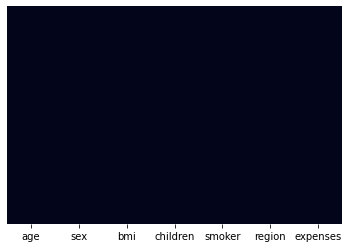

In [7]:
#visualize the null values
sns.heatmap(df.isnull()==True, cbar=False, yticklabels=False)
#It shows that there is no null values in the datasets

In [8]:
df.shape

(1338, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
# x and y variables
x=df.drop('expenses', axis=1)

In [11]:
y=df['expenses'].values

In [12]:
print(y)

[16884.92  1725.55  4449.46 ...  1629.83  2007.95 29141.36]


In [13]:
#Now convert the catagorical variables to numeric variables
cols=['sex', 'smoker', 'region']
x= pd.get_dummies(data=x, columns=cols, drop_first=True)

In [14]:
x.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,0,1,0,0,1
1,18,33.8,1,1,0,0,1,0
2,28,33.0,3,1,0,0,1,0
3,33,22.7,0,1,0,1,0,0
4,32,28.9,0,1,0,1,0,0


In [15]:
#scale the features age and bmi to the same scale as of the other features
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler=MinMaxScaler()
scale_cols=['age', 'bmi']
x[scale_cols]=scaler.fit_transform(x[scale_cols])

In [17]:
x.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0.021739,0.320755,0,0,1,0,0,1
1,0.000000,0.479784,1,1,0,0,1,0
2,0.217391,0.458221,3,1,0,0,1,0
3,0.326087,0.180593,0,1,0,1,0,0
4,0.304348,0.347709,0,1,0,1,0,0


In [18]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, random_state=0)

In [21]:
tree_reg=DecisionTreeRegressor(max_depth=2, criterion='mse')
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [22]:
y_pred_reg=tree_reg.predict(x_test)

In [23]:
y_pred_reg.T

array([12428.30292135, 12428.30292135, 41512.0223301 , 12428.30292135,
       12428.30292135,  5416.65981982,  5416.65981982, 12428.30292135,
        5416.65981982,  5416.65981982,  5416.65981982, 12428.30292135,
       12428.30292135,  5416.65981982, 21502.9989    , 12428.30292135,
       12428.30292135,  5416.65981982,  5416.65981982, 41512.0223301 ,
       21502.9989    , 12428.30292135, 12428.30292135, 21502.9989    ,
        5416.65981982,  5416.65981982,  5416.65981982,  5416.65981982,
        5416.65981982, 12428.30292135,  5416.65981982, 41512.0223301 ,
       12428.30292135, 12428.30292135, 21502.9989    ,  5416.65981982,
       12428.30292135, 41512.0223301 , 41512.0223301 ,  5416.65981982,
        5416.65981982,  5416.65981982, 21502.9989    , 41512.0223301 ,
       41512.0223301 ,  5416.65981982, 12428.30292135,  5416.65981982,
        5416.65981982, 12428.30292135,  5416.65981982,  5416.65981982,
       21502.9989    , 41512.0223301 , 12428.30292135,  5416.65981982,
      

### How to Check the Model Variabiity and Bias-Variance Trade-Off??

In [24]:
from sklearn.model_selection import cross_validate, KFold

In [25]:
K_Fold=KFold(n_splits=10, shuffle=True, random_state=42)
depth={}

for i in range(2,11):
    tree_cv=cross_validate(DecisionTreeRegressor(max_depth=i), x, y, cv=K_Fold, scoring=['r2'])
    depth['depth_' +str(i)]=tree_cv['test_r2']
depth

{'depth_2': array([0.82797876, 0.83627513, 0.82846619, 0.79627887, 0.88576425,
        0.82437852, 0.78101358, 0.73007204, 0.80832654, 0.83971832]),
 'depth_3': array([0.85628937, 0.87237849, 0.85760018, 0.81877829, 0.91590791,
        0.85343578, 0.83150173, 0.75706664, 0.80167779, 0.84678683]),
 'depth_4': array([0.85300297, 0.86905526, 0.86086231, 0.84318317, 0.91869788,
        0.84800633, 0.82755151, 0.74791778, 0.81648643, 0.85371445]),
 'depth_5': array([0.84993277, 0.8802852 , 0.87258964, 0.8492467 , 0.89978505,
        0.85098472, 0.80967563, 0.74832063, 0.81547351, 0.85134251]),
 'depth_6': array([0.84655847, 0.85905411, 0.88005639, 0.82556283, 0.89192687,
        0.84481696, 0.80515752, 0.7439385 , 0.80581394, 0.82353514]),
 'depth_7': array([0.84696145, 0.830672  , 0.87059201, 0.79272067, 0.89053487,
        0.83906452, 0.78539106, 0.73088233, 0.79234813, 0.78097405]),
 'depth_8': array([0.83324937, 0.84657898, 0.83238617, 0.73146118, 0.85142286,
        0.79962743, 0.72078

In [26]:
#Now convert it into dataframe
df=pd.DataFrame(depth)

In [27]:
df

,depth_2,depth_3,depth_4,depth_5,depth_6,depth_7,depth_8,depth_9,depth_10
0,0.827979,0.856289,0.853003,0.849933,0.846558,0.846961,0.833249,0.796544,0.776729
1,0.836275,0.872378,0.869055,0.880285,0.859054,0.830672,0.846579,0.816953,0.811823
2,0.828466,0.857600,0.860862,0.872590,0.880056,0.870592,0.832386,0.830740,0.795783
3,0.796279,0.818778,0.843183,0.849247,0.825563,0.792721,0.731461,0.659414,0.658477
4,0.885764,0.915908,0.918698,0.899785,0.891927,0.890535,0.851423,0.850032,0.823442
5,0.824379,0.853436,0.848006,0.850985,0.844817,0.839065,0.799627,0.745643,0.697837
6,0.781014,0.831502,0.827552,0.809676,0.805158,0.785391,0.720780,0.636753,0.605507
7,0.730072,0.757067,0.747918,0.748321,0.743938,0.730882,0.713896,0.717592,0.684879
8,0.808327,0.801678,0.816486,0.815474,0.805814,0.792348,0.785709,0.753075,0.703969
9,0.839718,0.846787,0.853714,0.851343,0.823535,0.780974,0.733151,0.687662,0.683343


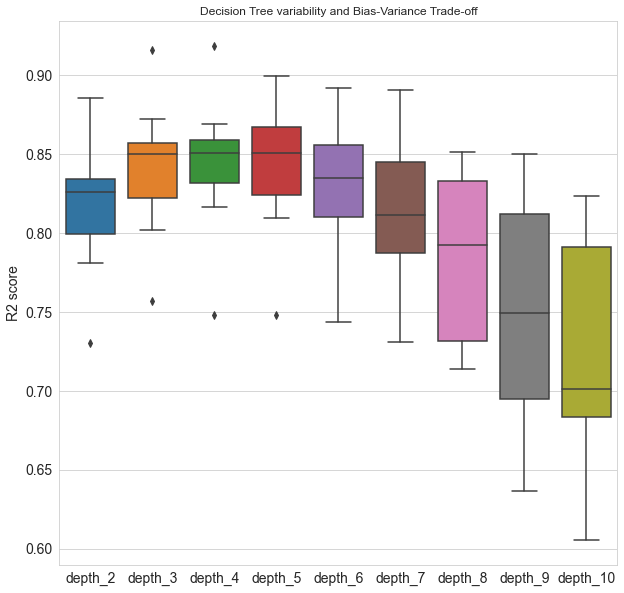

In [28]:
# Now choose the best depth through visualozing boxplots
plt.figure(figsize=(10,10))
sns.set_style('whitegrid')
sns.boxplot(data=df)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("R2 score", fontsize=14)
plt.title("Decision Tree variability and Bias-Variance Trade-off")
plt.show()

### Random Forest Regressor

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.30, random_state=42)

In [54]:
rf=RandomForestRegressor(random_state=42)

In [55]:
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [56]:
y_pred=rf.predict(x_test)

In [57]:
y_pred

array([ 9113.4467,  5775.2895, 28333.7625, 11963.1076, 34564.6804,
        7303.7348,  2354.8026, 14324.4421,  5896.0057, 10513.4836,
       19052.3701,  7024.419 ,  5191.5607, 46348.8059, 48611.3865,
       45515.056 , 10632.3235, 43645.0496, 10234.827 , 24915.7127,
        8564.9493,  9937.2971,  2359.9426,  2270.707 , 12292.7958,
       11020.6635, 14028.1423,  7676.257 , 10527.6405,  7169.4513,
        8615.6345, 12022.6515,  3197.232 ,  5776.3471,  4055.9   ,
       10479.1845,  4699.0369,  7562.1473, 23990.2936, 39735.5721,
        7308.3365,  2966.8069, 14737.8093, 14959.9681,  5965.568 ,
       15756.9364, 18403.2762, 12158.3254, 41721.4834,  7917.2368,
       14011.7006,  2966.6268,  7058.9458,  1912.8929, 11765.0436,
       10594.338 ,  3710.5168, 46097.8787, 11903.713 , 14169.4479,
       13829.1528,  7577.3978, 21579.1365,  7754.426 , 11552.4485,
        8648.7416, 17814.9038, 12263.5199,  8692.8077,  2852.4565,
        7517.5189,  9288.7617, 11634.2561, 10934.3092,  9511.7

In [68]:
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

In [69]:
from sklearn.metrics import mean_absolute_error

In [70]:
from sklearn.metrics import explained_variance_score

In [71]:
mean_squared_error(y_test, y_pred)

21753174.20396026

In [72]:
mean_absolute_error(y_test, y_pred)

2672.654726119403

In [73]:
r2_score(y_test, y_pred)

0.8516400564765458

In [74]:
explained_variance_score(y_test, y_pred)

0.8541039654736797

In [75]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [76]:
rms = sqrt(mean_squared_error(y_test, y_pred))

In [77]:
print("Root Mean Squared Error::", rms)

Root Mean Squared Error:: 4664.029824514447


In [78]:
#other method
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(y_test, y_pred))

In [79]:
rmse

4664.029824514447

In [80]:
#other method
RMSD = sqrt(mean_squared_error(y_test, y_pred))
print(RMSD)

4664.029824514447


### let's try by scaling of the features

In [81]:
df=pd.read_csv('insurance.csv')

In [82]:
df.head(2)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55


In [133]:
df2=df.copy()

In [134]:
df2.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,yes,southwest,16884.92
1,18,0,33.8,1,no,southeast,1725.55
2,28,0,33.0,3,no,southeast,4449.46
3,33,0,22.7,0,no,northwest,21984.47
4,32,0,28.9,0,no,northwest,3866.86


### Solve the catagorical variables


In [135]:
df2['sex']=pd.get_dummies(df2['sex'])

In [136]:
df2['smoker']=pd.get_dummies(df2['smoker'])
df2['region']=pd.get_dummies(df2['region'])

In [137]:
df2.head(2)

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,0,0,16884.92
1,18,1,33.8,1,1,0,1725.55


In [142]:
x=df2.drop('expenses', axis=1).values

In [143]:
from sklearn.preprocessing import StandardScaler

In [147]:
scaler=StandardScaler().fit(x)

In [148]:
x_scaled=scaler.transform(x)

In [150]:
x_scaled

array([[-1.43876426, -1.0105187 , -0.4536457 , -0.90861367, -1.97058663,
        -0.56526686],
       [-1.50996545,  0.98959079,  0.51418574, -0.07876719,  0.5074631 ,
        -0.56526686],
       [-0.79795355,  0.98959079,  0.38295436,  1.58092576,  0.5074631 ,
        -0.56526686],
       ...,
       [-1.50996545, -1.0105187 ,  1.02270734, -0.90861367,  0.5074631 ,
        -0.56526686],
       [-1.29636188, -1.0105187 , -0.79812808, -0.90861367,  0.5074631 ,
        -0.56526686],
       [ 1.55168573, -1.0105187 , -0.25679863, -0.90861367, -1.97058663,
        -0.56526686]])

In [156]:
y=df2['expenses'].values

In [160]:
x_scaled.ndim

2

In [162]:
y.ndim

1

In [164]:
y=y.reshape(-1,1)

In [165]:
y.ndim

2

In [175]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor

In [176]:
rfg=RandomForestRegressor()

In [177]:
rfr.fit(x_scaled,y)

RandomForestRegressor(random_state=42)

In [178]:
from sklearn.model_selection import train_test_split

In [179]:
x_train, x_test, y_train, y_test=train_test_split(x_scaled, y, test_size=0.33, random_state=42)

In [180]:
rfr.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [186]:
y_pred1=rfr.predict(x_test)

In [187]:
y_pred1

array([ 9872.6452 ,  5440.4517 , 28482.8168 ,  9022.7466 , 34408.7851 ,
        8313.6111 ,  1765.3218 , 14109.12695,  6841.6827 , 11050.2332 ,
       20290.959  ,  7143.269  ,  7698.8412 , 46475.0239 , 48623.465  ,
       45052.5048 , 10662.7551 , 44300.3319 ,  8113.8911 , 24584.7979 ,
        5351.0025 ,  8450.525  ,  1863.8446 ,  2701.6882 , 12104.1726 ,
       12759.1781 , 13997.1338 ,  5000.1737 , 11896.9584 ,  3497.8959 ,
        8000.3287 , 11879.9572 ,  2245.774  ,  5724.2664 ,  4240.7094 ,
       11142.5783 ,  4120.5079 ,  7784.4048 , 24076.9005 , 39584.7671 ,
       11811.8841 ,  4157.2801 , 12659.1359 , 15153.8365 ,  5937.5576 ,
       15193.3961 , 15881.1616 ,  5945.1886 , 42648.0696 ,  6630.4265 ,
       13984.9711 ,  2580.619  ,  6651.0612 ,  1737.4903 , 11052.6232 ,
       11034.1084 ,  3433.4563 , 43432.6108 , 12177.8407 , 15819.463  ,
       13810.7375 ,  6519.7473 , 20272.4088 ,  7356.0496 , 12047.8746 ,
        6249.959  , 18430.7141 , 14557.6192 ,  5735.5959 ,  2130

In [184]:
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score

In [188]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [189]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(y_test, y_pred1))

In [190]:
rmse

4853.853411053622

In [191]:
mean_squared_error(y_test, y_pred1)

23559892.93599688

In [192]:
mean_absolute_error(y_test, y_pred1)

2587.729627601811

In [205]:
r2_score(y_test, y_pred1)

0.8392306257343686

### Support Vector Machine

In [193]:
from sklearn.svm import SVR

In [194]:
svr=SVR()

In [195]:
svr.fit(x_train, y_train)

SVR()

In [196]:
y_pred2=svr.predict(x_test)

In [197]:
y_pred2

array([9548.6492369 , 9491.9456159 , 9612.99655781, 9535.00244734,
       9583.2107324 , 9522.63310257, 9485.24053682, 9592.22067791,
       9532.57185061, 9544.23988069, 9589.23386138, 9507.44436989,
       9468.70154831, 9596.57550479, 9607.15034431, 9610.70431738,
       9560.83886019, 9612.54374393, 9524.99636281, 9606.07031321,
       9545.7321941 , 9517.88348022, 9466.54410343, 9530.7657418 ,
       9553.70589193, 9577.55192924, 9585.51295262, 9502.29288248,
       9553.9747789 , 9466.97959305, 9542.88202234, 9574.15847929,
       9476.94950987, 9522.05297197, 9460.71628288, 9563.42584085,
       9466.80673059, 9513.09297587, 9611.80128207, 9606.07780814,
       9545.63338805, 9460.90519606, 9573.67500901, 9569.734595  ,
       9497.16684919, 9569.90035931, 9480.14728835, 9507.27377408,
       9604.82743877, 9503.69581027, 9592.79542169, 9460.91219868,
       9530.07477303, 9509.23346743, 9570.45484959, 9561.44614684,
       9515.49848467, 9595.35800902, 9578.50862812, 9575.72321

In [198]:
rmse = math.sqrt(mean_squared_error(y_test, y_pred2))

In [199]:
rmse

12572.562513445415

In [200]:
mean_absolute_error(y_test, y_pred2)

8274.287128938737

In [201]:
mean_squared_error(y_test, y_pred2)

158069328.15449288

In [202]:
explained_variance_score(y_test, y_pred2)

0.005399802661414932

In [204]:
r2_score(y_test, y_pred2)

-0.0786427190914274

##### Explanation of r2_score: r2_score. R^2 (coefficient of determination) regression score function. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse)

In [50]:
# Reference:
# machine-learning_Dr.B. (2020, March 18). Lesson 17 Decision Trees. 
# YouTube. https://www.youtube.com/watch?v=KIuB9nsVKqY&t=709s  
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74